# Band structure of bulk bismuth

In [1]:
from nanonet.tb import Hamiltonian, Orbitals
from nanonet.tb import set_tb_params, get_k_coords

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.1.5


Below we set a LCAO sp3 basis set for Bi atoms.

In [2]:
bi_orb = Orbitals('Bi')
bi_orb.add_orbital("s", energy=-10.906,
                   principal=0, orbital=0, magnetic=0, spin=0)
bi_orb.add_orbital("px", energy=-0.486,
                   principal=0, orbital=1, magnetic=-1, spin=0)
bi_orb.add_orbital("py", energy=-0.486,
                   principal=0, orbital=1, magnetic=1, spin=0)
bi_orb.add_orbital("pz", energy=-0.486,
                   principal=0, orbital=1, magnetic=0, spin=0)
bi_orb.add_orbital("s", energy=-10.906,
                   principal=0, orbital=0, magnetic=0, spin=1)
bi_orb.add_orbital("px", energy=-0.486,
                   principal=0, orbital=1, magnetic=-1, spin=1)
bi_orb.add_orbital("py", energy=-0.486,
                   principal=0, orbital=1, magnetic=1, spin=1)
bi_orb.add_orbital("pz", energy=-0.486,
                   principal=0, orbital=1, magnetic=0, spin=1)

The primitive cell of crystalline bismuth has two atoms:

In [3]:
xyz_coords = """2
Bi2 cell
Bi1       0.0    0.0    0.0
Bi2       0.0    0.0    5.52321494
"""

In [4]:
h = Hamiltonian(xyz=xyz_coords, nn_distance=4.6, so_coupling=1.5)

The verbosity level is 1
The radius of the neighbourhood is 4.6 Ang

---------------------------------

The xyz-file:
 2
Bi2 cell
Bi1       0.0    0.0    0.0
Bi2       0.0    0.0    5.52321494

---------------------------------

Basis set 
 Num of species {'Bi': 2} 


 Bi 
title | energy  | n | l | m  | s
------+---------+---+---+----+--
s     | -10.906 | 0 | 0 | 0  | 0
px    | -0.486  | 0 | 1 | -1 | 0
py    | -0.486  | 0 | 1 | 1  | 0
pz    | -0.486  | 0 | 1 | 0  | 0
s     | -10.906 | 0 | 0 | 0  | 1
px    | -0.486  | 0 | 1 | -1 | 1
py    | -0.486  | 0 | 1 | 1  | 1
pz    | -0.486  | 0 | 1 | 0  | 1
------+---------+---+---+----+--
 
---------------------------------



In [5]:
import numpy as np
def radial_dep(coords):

    norm_of_coords = np.linalg.norm(coords)
    if norm_of_coords < 3.3:
        return 1
    elif 3.7 > norm_of_coords > 3.3:
        return 2
    elif 5.0 > norm_of_coords > 3.7:
        return 3
    else:
        return 100

In [6]:
# 1NN - Bi-Bi
PAR1 = {'ss_sigma': -0.608,
        'sp_sigma': 1.320,
        'pp_sigma': 1.854,
        'pp_pi': -0.600}

# 2NN - Bi-Bi
PAR2 = {'ss_sigma': -0.384,
        'sp_sigma': 0.433,
        'pp_sigma': 1.396,
        'pp_pi': -0.344}

# 3NN - Bi-Bi
PAR3 = {'ss_sigma': 0,
        'sp_sigma': 0,
        'pp_sigma': 0.156,
        'pp_pi': 0}

In [7]:
set_tb_params(PARAMS_BI_BI1=PAR1, PARAMS_BI_BI2=PAR2, PARAMS_BI_BI3=PAR3)

In [8]:
h.initialize(radial_dep)

Radial dependence function: None

---------------------------------

Discrete radial dependence function:

def radial_dep(coords):

    norm_of_coords = np.linalg.norm(coords)
    if norm_of_coords < 3.3:
        return 1
    elif 3.7 > norm_of_coords > 3.3:
        return 2
    elif 5.0 > norm_of_coords > 3.7:
        return 3
    else:
        return 100


---------------------------------

Unique distances: 
    
---------------------------------



In [9]:
primitive_cell = [[-2.2666    , -1.30862212,  3.93223333],
                  [ 2.2666    , -1.30862212,  3.93223333],
                  [ 0.        ,  2.61724424,  3.93223333]]

In [10]:
h.set_periodic_bc(primitive_cell)

Primitive_cell_vectors: 
 [[-2.2666, -1.30862212, 3.93223333], [2.2666, -1.30862212, 3.93223333], [0.0, 2.61724424, 3.93223333]] 

---------------------------------



In [11]:
sym_points = ['K', 'GAMMA', 'T', 'W', 'L', 'LAMBDA']
num_points = [10, 10, 10, 10, 10]
special_k_points = {'GAMMA': [0.0, 0.0, 0.0],
 'K': [0.35985144675492087, -0.8002652081237402, 0.5326462926072546],
 'L': [0.69305, -0.4001326040618701, 0.2663231463036273],
 'LAMBDA': [0.0, 0.0, 0.39948471945544095],
 'T': [0.0, 0.0, 0.7989694389108819],
 'U': [0.5397771701323816, -0.31164049447834485, 0.7989694389108819],
 'W': [0.3598514467549211, -0.6232809889566897, 0.7989694389108819],
 'X': [0.0, -0.8002652081237402, 0.5326462926072546]}
k_points = get_k_coords(sym_points, num_points, special_k_points)

In [12]:
band_structure = []
for jj, item in enumerate(k_points):
    [eigenvalues, _] =\
        h.diagonalize_periodic_bc(k_points[jj])
    band_structure.append(eigenvalues)

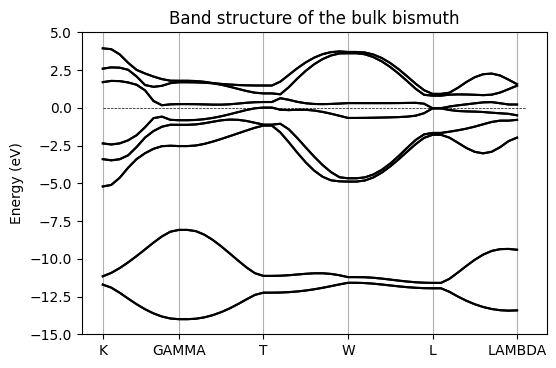

In [13]:
import matplotlib.pyplot as plt
plt.figure(dpi=100)
ax = plt.axes()
plt.ylim((-15, 5))
ax.set_title('Band structure of the bulk bismuth')
ax.set_ylabel('Energy (eV)')
ax.plot(band_structure, 'k')
ax.plot([0, len(band_structure)], [0, 0], '--', color='k', linewidth=0.5)
plt.xticks(np.insert(np.cumsum(num_points)-1,0,0), labels=sym_points)
ax.xaxis.grid()
plt.show()